# **Air Quality Index (AQI)** 
### The data collected for AQI has been processed in the previous notebooks. This notebook aims to apply different `ML` model on the data to predict the AQI (proxy used is `PM 2.5`) of `Bangalore`.

**Feature Description**
****
|Feature| Desc.|
|---|---|
|T|Average Temperature (°C)|
|TM|Maximum Temperature (°C)|
|Tm|Minimum Temperature (°C)|
|H|Average relative humidity (%)|
|VV|Average visibility (km)|
|V|Average wind speed (km/h)|
|VM|Maximum sustained wind speed (km/h)|
|PM 2.5|Particulate Matter 2.5|

## **Libraries**

In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

In [130]:
df = pd.read_csv('Final_dataset.csv')

In [131]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,22.7,26.9,20.3,83.0,8.5,14.8,18.3,81.0
1,23.6,27.8,20.3,74.0,6.9,12.0,14.8,85.0
2,22.7,28.3,20.4,82.0,6.3,9.6,14.8,85.0
3,23.1,27.6,20.3,84.0,6.9,9.3,11.1,77.0
4,23.3,28.2,20.2,82.0,6.9,9.1,14.8,69.0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       962 non-null    float64
 1   TM      962 non-null    float64
 2   Tm      962 non-null    float64
 3   H       962 non-null    float64
 4   VV      962 non-null    float64
 5   V       962 non-null    float64
 6   VM      962 non-null    float64
 7   PM2.5   961 non-null    float64
dtypes: float64(8)
memory usage: 60.3 KB


In [133]:
df.describe()

,T,TM,Tm,H,VV,V,VM,PM2.5
count,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,962.000000,961.000000
mean,23.047193,28.173493,19.627235,75.844075,6.299792,5.068711,9.125052,94.345682
std,1.311011,1.745592,1.529075,9.660017,0.843510,2.658771,5.731423,50.689425
min,18.400000,20.800000,13.900000,40.000000,3.200000,0.200000,1.900000,30.000000
25%,22.200000,27.200000,19.000000,70.000000,5.800000,3.100000,5.400000,69.000000
50%,23.100000,28.300000,20.000000,77.000000,6.300000,4.800000,7.600000,87.100000
75%,23.900000,29.400000,20.600000,83.000000,6.900000,6.700000,11.100000,105.000000
max,27.200000,32.600000,22.600000,98.000000,9.200000,14.800000,81.300000,625.000000


## **Feature Engineering**

### Missing values

In [134]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    1
dtype: int64

In [135]:
# Since there is one null value, heatmap isn't able to display it.
# sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis');

In [136]:
df.loc[df.isnull().any(axis=1)]

,T,TM,Tm,H,VV,V,VM,PM2.5
476,21.1,29.6,18.8,80.0,6.3,5.0,9.4,NaN


In [137]:
df.dropna(inplace=True, ignore_index=True)

In [138]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

**There is no null values and also there are no categorical features.**

## **Declaring Dependent and Independent Variables**

In [139]:
X = df.iloc[:, :-1] # Dependent variables
y = df.iloc[:, -1]  # Independent variables

## **EDA**

In [140]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.673766,0.648699,-0.258860,0.363401,-0.002679,0.005969,-0.183745
TM,0.673766,1.000000,0.221052,-0.467039,0.321882,-0.194046,-0.153750,-0.059424
Tm,0.648699,0.221052,1.000000,0.430252,-0.018748,0.205717,0.123434,-0.269889
H,-0.258860,-0.467039,0.430252,1.000000,-0.434678,0.171501,0.100216,-0.096011
VV,0.363401,0.321882,-0.018748,-0.434678,1.000000,-0.009074,0.017560,-0.078535
V,-0.002679,-0.194046,0.205717,0.171501,-0.009074,1.000000,0.567400,-0.209050
VM,0.005969,-0.153750,0.123434,0.100216,0.017560,0.567400,1.000000,-0.114912
PM2.5,-0.183745,-0.059424,-0.269889,-0.096011,-0.078535,-0.209050,-0.114912,1.000000


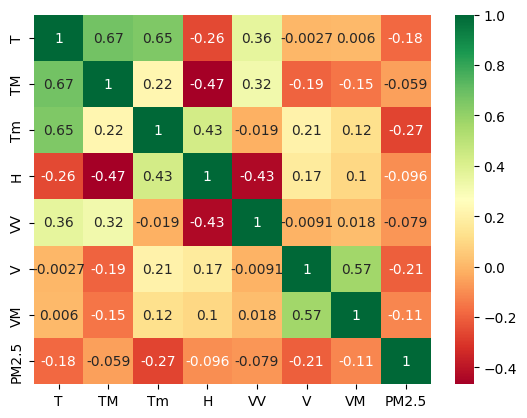

In [141]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn"); 

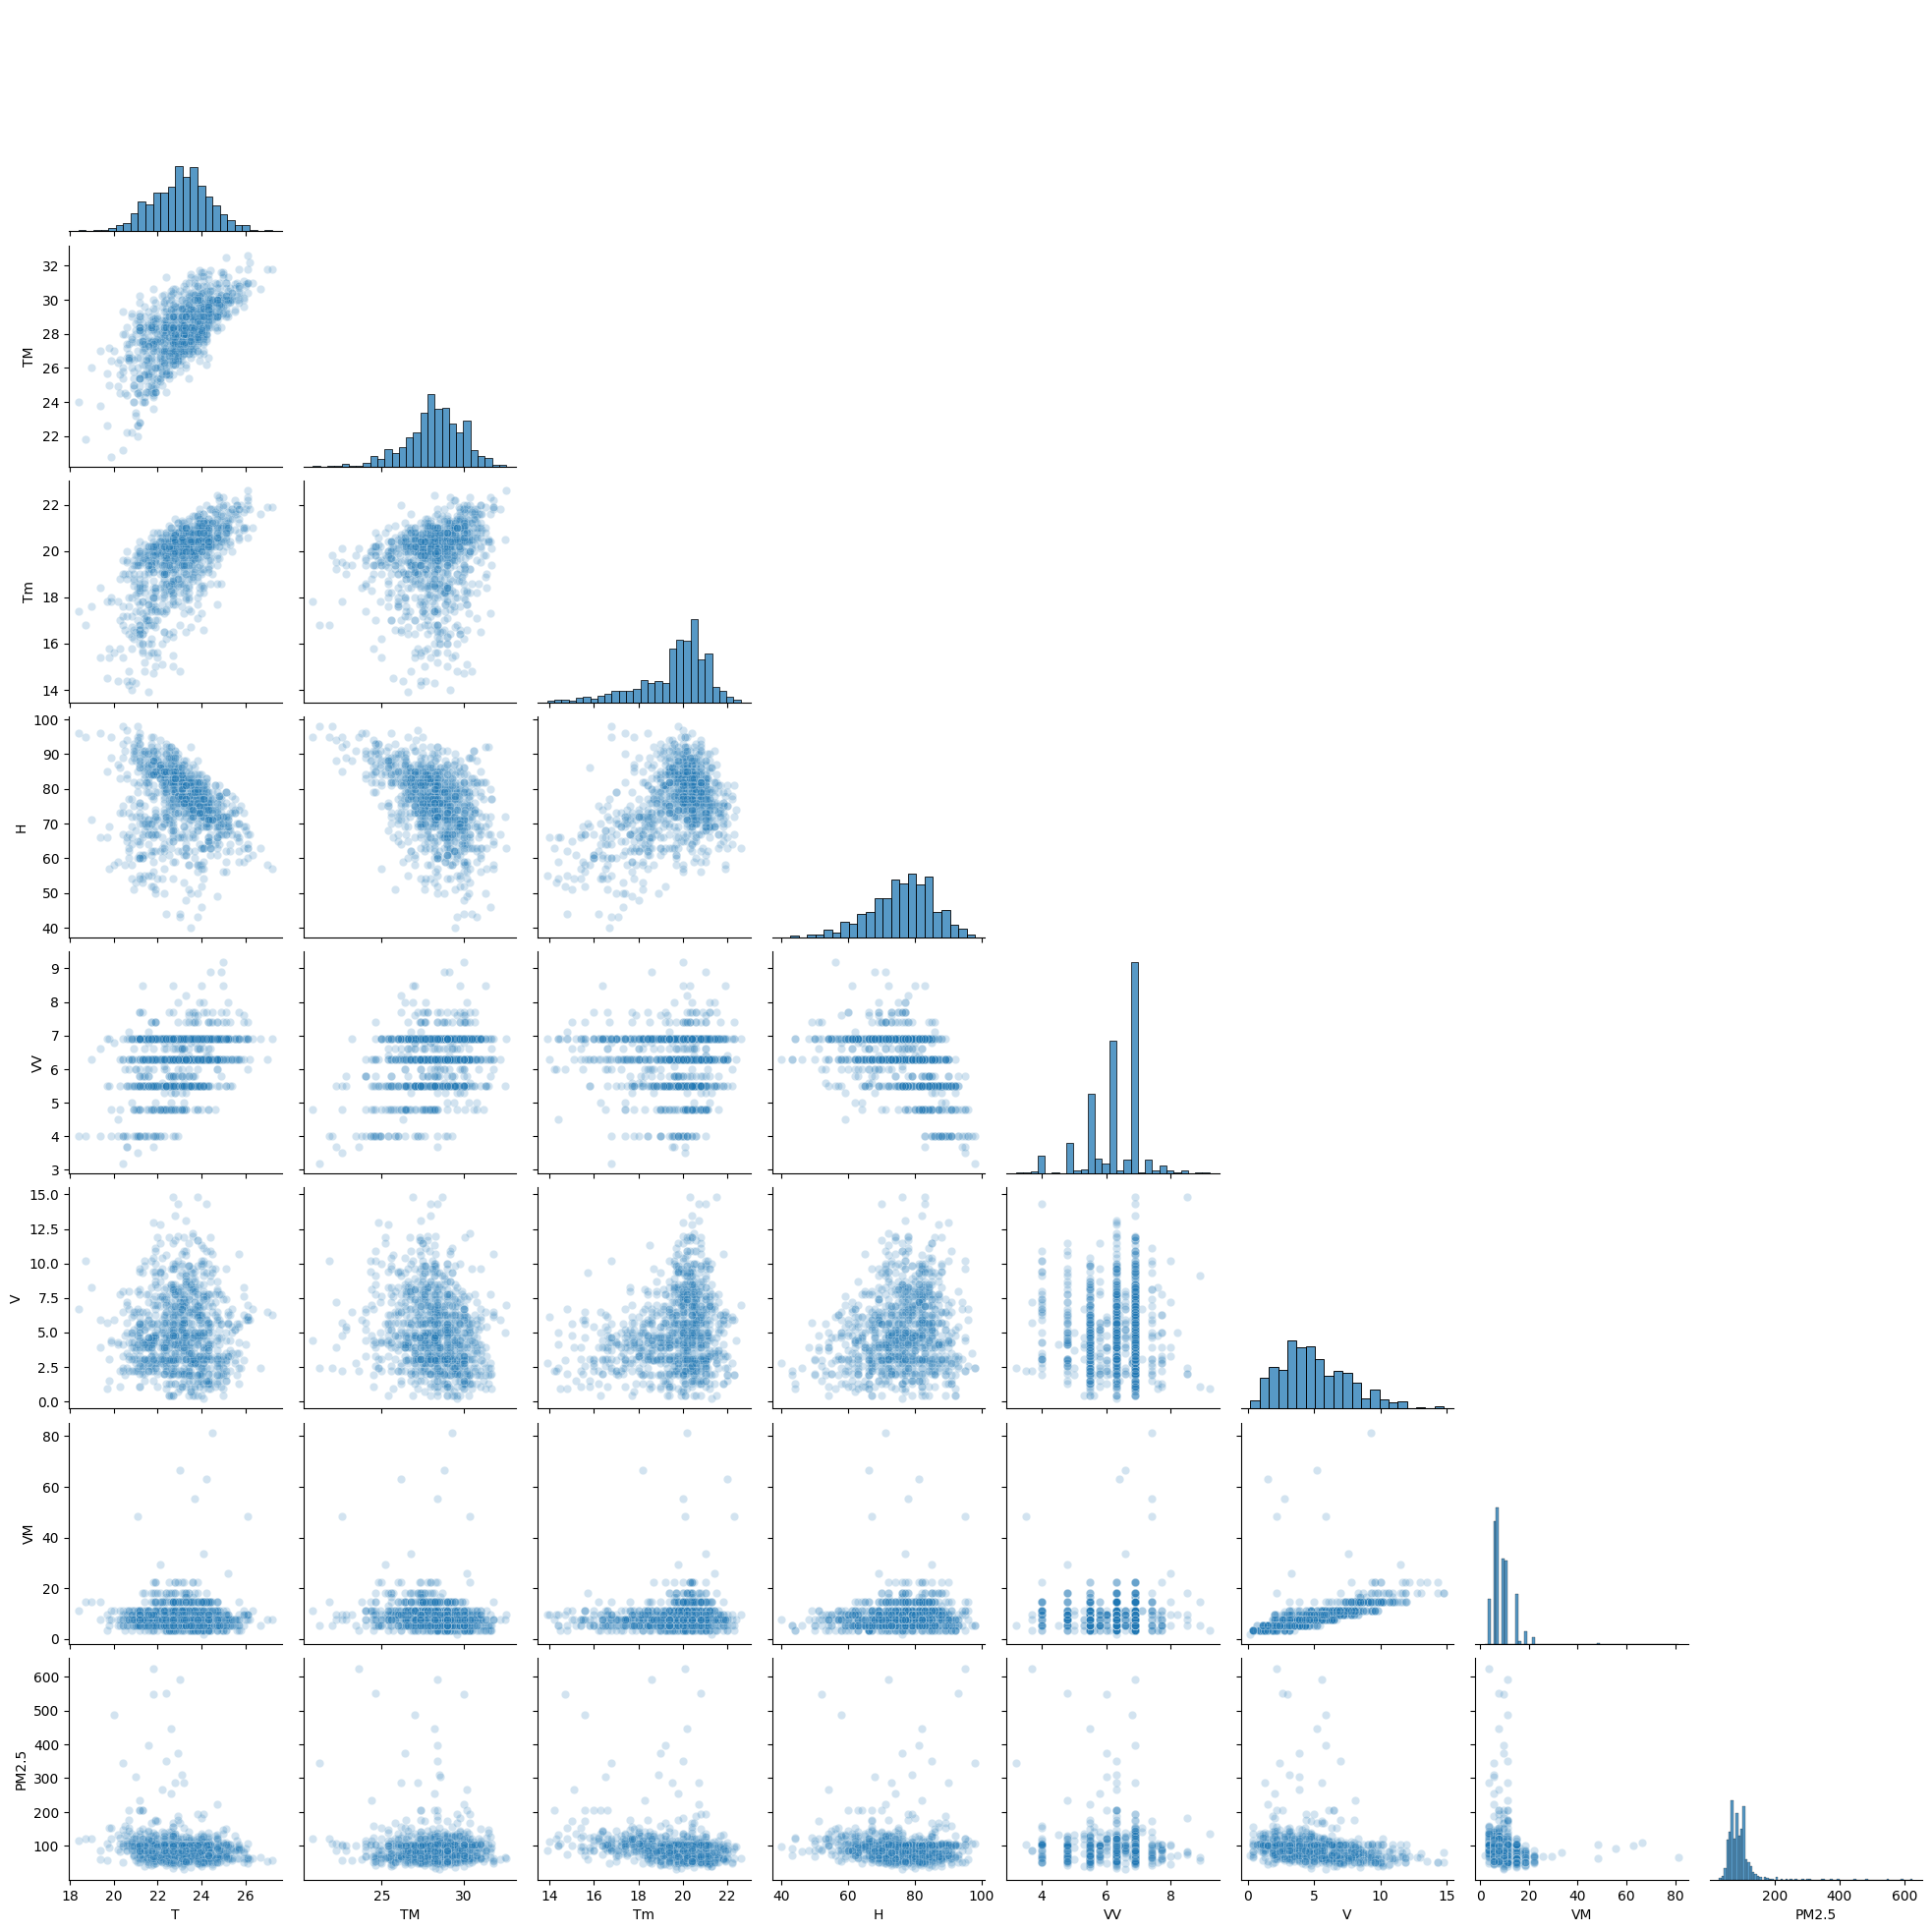

In [142]:
sns.pairplot(df, corner=True, plot_kws={'alpha': 0.2}); 

**As we can see that PM 2.5 doesn't seem to have a good `linear` relationship with the features. PM2.5 has the highest degree of correlation with V(-0.268)**

### Feature Importance
Feature importance gives a score for each feature of your data. The higher the score more important or relevant is the feature towards your output variable. <br><br>
Feature Importance is an in-built class that comes with `Tree Based Classifiers`, we will be using `Extra Tree Classifier` for extracting the top 10 features for the dataset.

In [143]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

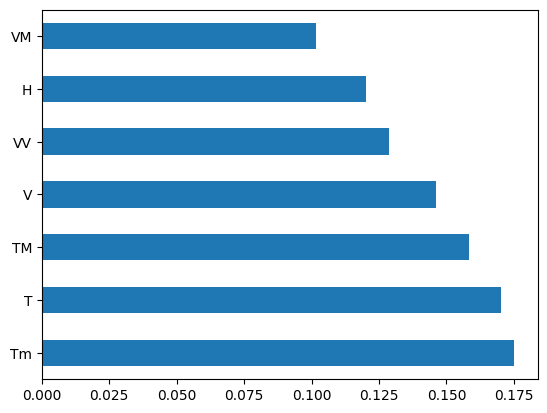

In [144]:
feat_IMP = pd.Series(model.feature_importances_, index = X.columns)
feat_IMP.nlargest(10).plot(kind='barh'); 

## **Splitting dataset INTO Train and Test Set**

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## **Linear Regression**

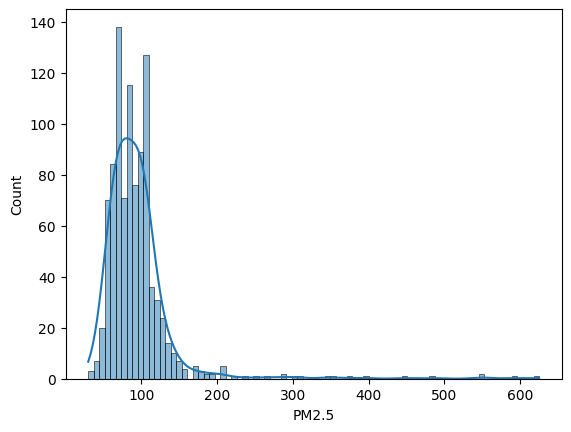

In [146]:
sns.histplot(y, kde=True); 

**The dependent variable is skewed towards right.**

In [147]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred_linear = regressor.predict(X_test)

### Model Evaluation

In [149]:
print(f'R^2 for Linear Regression on the training set: {regressor.score(X_train, y_train)}')

R^2 for Linear Regression on the training set: 0.10538944969097552


In [150]:
print(f'R^2 for Linear Regression on the test set: {regressor.score(X_test, y_test)}')

R^2 for Linear Regression on the test set: 0.09148976994469082


**R2 score aren't good implying that Linear Regression isn't a good model for this Dataset.**

In [151]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv=5)
score.mean()

-2585.484379361103

In [152]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_linear)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_linear)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_linear)}")

Mean Absolute Error (MAE): 21.780929708110087
Mean Squared Error (MSE): 1763.734861160488
Root Mean Squared Error (RMSE): 41.99684346662839


In [153]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
T,0.169357
TM,-0.182355
Tm,-8.684790
H,-0.071644
VV,-3.918901
V,-3.098837
VM,0.202394


**Coefficient Implications -**
Example - Keeping all features fixed, a unit increase in `H` would drop the `PM 2.5` by 0.908 times.

In [154]:
intercept = regressor.intercept_
intercept

310.6209505824796

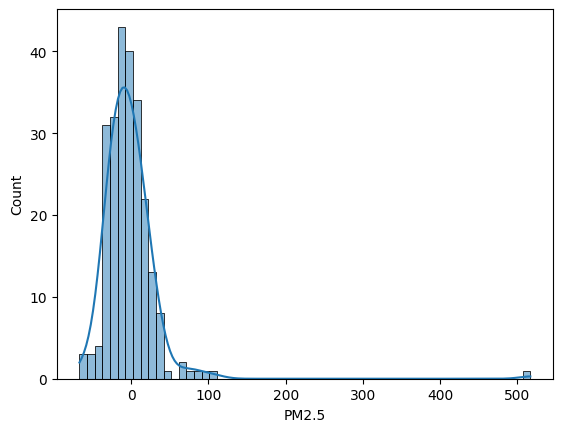

In [155]:
sns.histplot(y_test-y_pred_linear, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

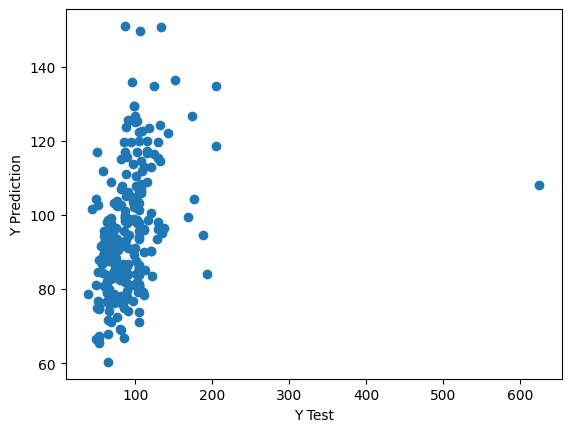

In [156]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### Pickle Import

In [157]:
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

## **Ridge Regression**

Ridge Regression: Linear Regression + Method to penalize higher slopes. $$Eq^n: \hat{y} = b_0+ \sum_i w_i\cdot x_i+ \lambda\cdot\sum_i (w_i)^2$$

In [158]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [159]:
ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-2, 1, 5, 10, 20, 30, 35, 40, 50, 60, 70, 80, 90, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 1, 5, 10, 20, 30,
                                   35, 40, 50, 60, 70, 80, 90, 100]},
             scoring='neg_mean_squared_error')

In [160]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-2571.6388524110744


In [161]:
y_pred_ridge = ridge_regressor.predict(X_test)

### Model Evaluation

In [162]:
print(f'R^2 for Ridge Regression on the training set: {ridge_regressor.score(X_train, y_train)}')

R^2 for Ridge Regression on the training set: -2488.2466408439964


In [163]:
print(f'R^2 for Ridge Regression on the test set: {ridge_regressor.score(X_test, y_test)}')

R^2 for Ridge Regression on the test set: -1731.6286300934917


In [164]:
score = cross_val_score(ridge_regressor, X, y, scoring = 'neg_mean_squared_error', cv=5)
score.mean()

-2584.824203845327

In [165]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_ridge)}")

Mean Absolute Error (MAE): 21.498701158440788
Mean Squared Error (MSE): 1731.6286300934917
Root Mean Squared Error (RMSE): 41.6128421294856


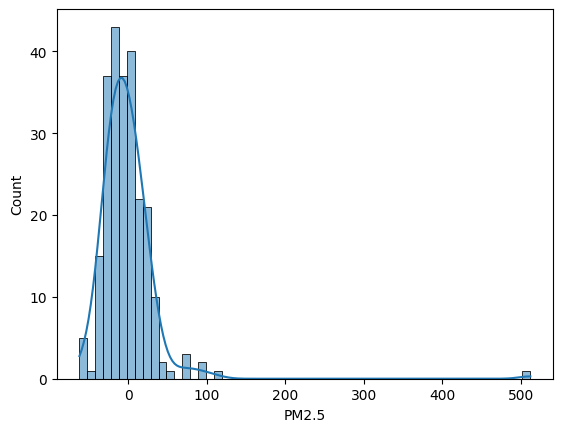

In [166]:
sns.histplot(y_test-y_pred_ridge, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

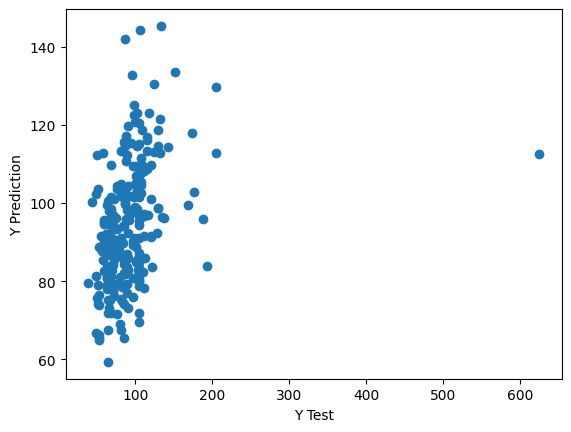

In [167]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### Pickle Import

In [168]:
with open('ridge_regression_model.pkl', 'wb') as file:
    pickle.dump(ridge_regressor, file)

## **Lasso Regression**

Lasso Regression: Linear Regression + method to penalize higher slopes (better than ridge regression and can also be used for feature selection). $$Eq^n: \hat{y} = b_0 + \sum_i w_i\cdot x_i + \lambda\cdot \sum_i |w_i|$$

In [169]:
from sklearn.linear_model import Lasso

In [170]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 50]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(X, y)

C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.043e+05, tolerance: 2.298e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.207e+05, tolerance: 2.277e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [171]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-2566.876819438123


In [172]:
y_pred_lasso = lasso_regressor.predict(X_test)

### Model Evaluation

In [173]:
print(f'R^2 for Lasso Regression on the training set: {lasso_regressor.score(X_train, y_train)}')
print(f'R^2 for Lasso Regression on the test set: {lasso_regressor.score(X_test, y_test)}')

R^2 for Lasso Regression on the training set: -2488.083812794981
R^2 for Lasso Regression on the test set: -1737.21266679537


In [174]:
score = cross_val_score(lasso_regressor, X, y, scoring = 'neg_mean_squared_error', cv=5)
score.mean()

C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.626e+05, tolerance: 2.070e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.409e+05, tolerance: 2.080e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

-2583.528079276083

In [175]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_lasso)}")

Mean Absolute Error (MAE): 21.327876739027072
Mean Squared Error (MSE): 1737.21266679537
Root Mean Squared Error (RMSE): 41.679883238744445


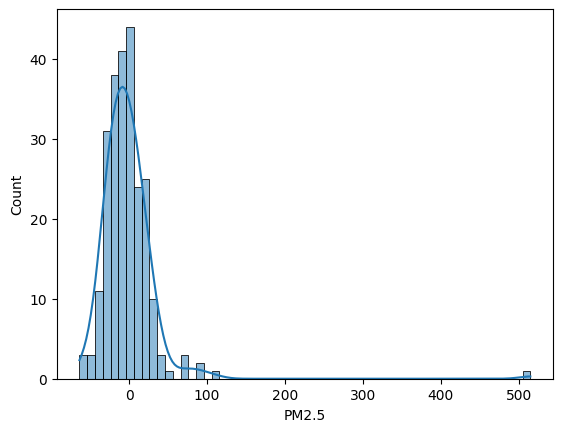

In [176]:
sns.histplot(y_test-y_pred_lasso, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

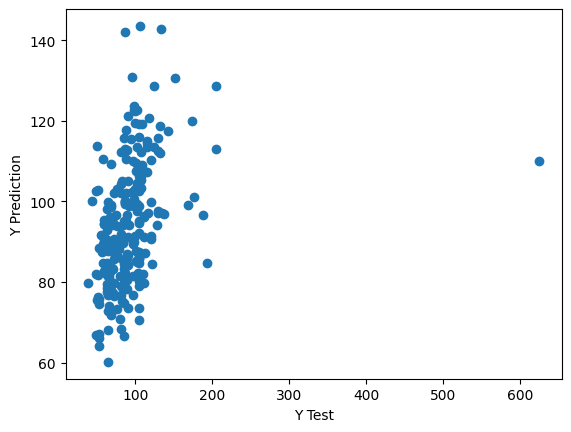

In [177]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### Pickle Import

In [178]:
with open('lasso_regression_model.pkl', 'wb') as file:
    pickle.dump(lasso_regressor, file)

## **Decision Tree Regression**

In [179]:
from sklearn.tree import DecisionTreeRegressor
dTree_regressor = DecisionTreeRegressor(criterion='squared_error', random_state=0)
dTree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

### Model Evaluation

In [180]:
y_pred_dtree = dTree_regressor.predict(X_test)

In [181]:
print(f'Coefficient of determination R^2 on the Train Set: {dTree_regressor.score(X_train, y_train)}')
print(f'Coefficient of determination R^2 on the Test Set: {dTree_regressor.score(X_test, y_test)}')

Coefficient of determination R^2 on the Train Set: 1.0
Coefficient of determination R^2 on the Test Set: -1.1025183678935782


**Model is overfitting**

In [182]:
score = cross_val_score(dTree_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
score.mean()

-6058.53843723014

In [183]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dtree)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dtree)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_dtree)}")

Mean Absolute Error (MAE): 32.07925311203319
Mean Squared Error (MSE): 4081.7206224066394
Root Mean Squared Error (RMSE): 63.88834496531147


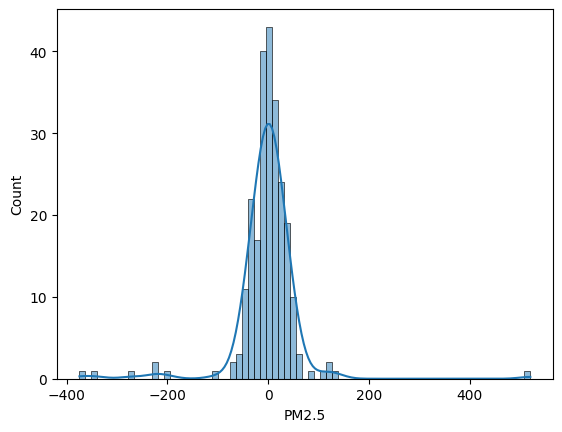

In [184]:
sns.histplot(y_test-y_pred_dtree, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

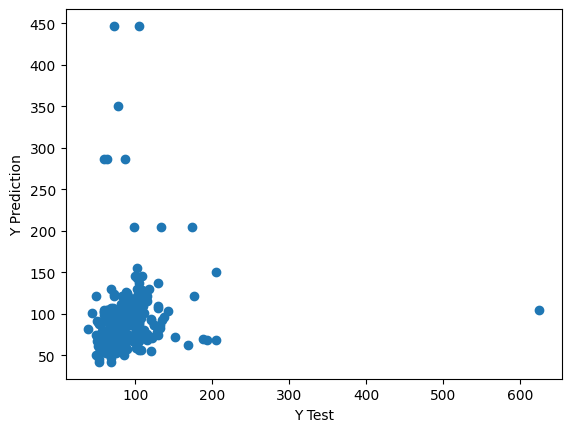

In [185]:
plt.scatter(y_test, y_pred_dtree)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### **Decision Tree Visualization**

Sklearn acutally has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install pydot library. 

In [186]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [187]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'H', 'VV', 'V', 'VM']

In [188]:
dot_data = StringIO()
export_graphviz(dTree_regressor, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
img = Image(graph.create_png())

with open('decision_tree_visu.png', 'wb') as dt:
    dt.write(img.data)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.699611 to fit



### **Hyperparamter Tuning on Decision Tree**

In [189]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

In [190]:
params = {
    "splitter" : ["best", "random"], 
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15], 
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4], 
    "max_features": ["auto", "log2", "sqrt", None], 
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

In [191]:
from sklearn.model_selection import GridSearchCV
random_search = GridSearchCV(dTree_regressor, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv=10, verbose=3)

In [192]:
from datetime import datetime
def timer(start_time=None):
    if not start_time: 
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [193]:
start_time = timer() # timing starts from this points for "start_time" variable
random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 14080 candidates, totalling 140800 fits


C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
35200 fits failed out of a total of 140800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26369 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
 


 Time taken: 0 hours 2 minutes and 25.29 seconds.


C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [           nan            nan            nan ... -2674.01135637
 -2693.56330718 -2674.01135637]
  warnings.warn(


In [194]:
random_search.best_params_

{'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [195]:
random_search.best_score_

-2552.5694016477546

In [196]:
y_pred_dtree_tuned = random_search.predict(X_test)

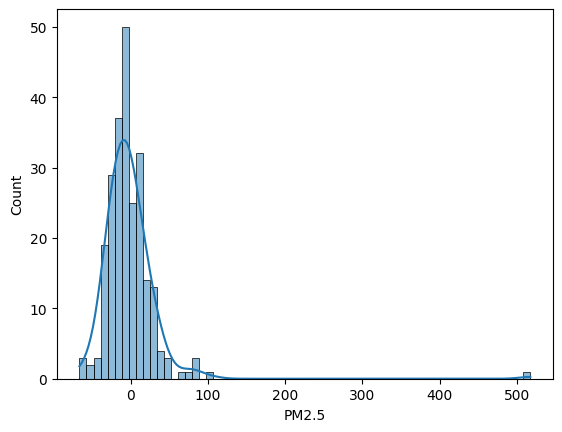

In [197]:
sns.histplot(y_test-y_pred_dtree_tuned, kde=True); 

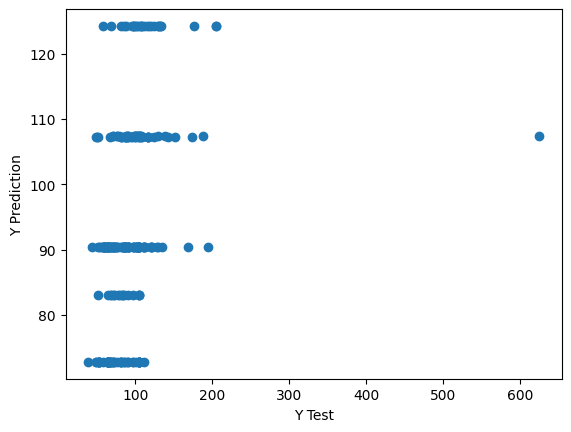

In [198]:
plt.scatter(y_test, y_pred_dtree_tuned)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

In [199]:
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_dtree_tuned)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_dtree_tuned)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_dtree_tuned)}")

Mean Absolute Error (MAE): 21.362763906427997
Mean Squared Error (MSE): 1747.6155063204524
Root Mean Squared Error (RMSE): 41.80449146109127


### Pickle Import

In [200]:
with open('dtree_regression_model.pkl', 'wb') as file:
    pickle.dump(random_search, file)

## **Random Forest Regression**

In [201]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [202]:
print(f'Coefficient of determination R^2 on the Train Set: {rf_regressor.score(X_train, y_train)}')
print(f'Coefficient of determination R^2 on the Test Set: {rf_regressor.score(X_test, y_test)}')

Coefficient of determination R^2 on the Train Set: 0.8600003187888339
Coefficient of determination R^2 on the Test Set: 0.0525812244552627


In [203]:
score = cross_val_score(rf_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
score.mean()

-2848.987531496292

### Model Evaluation

In [204]:
y_pred_rf = rf_regressor.predict(X_test)

In [205]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_rf)}")

Mean Absolute Error (MAE): 23.69088796680498
Mean Squared Error (MSE): 1839.2699028215766
Root Mean Squared Error (RMSE): 42.88671009557129


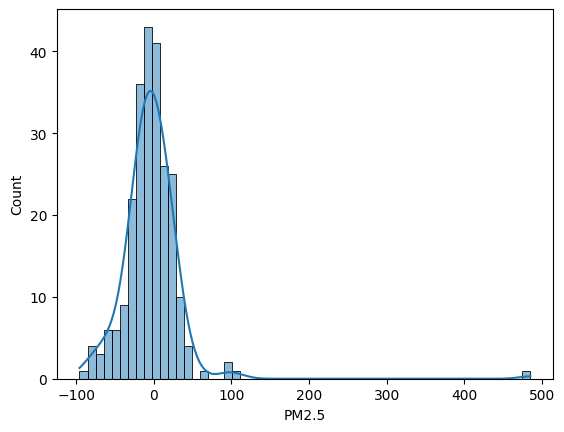

In [206]:
sns.histplot(y_test-y_pred_rf, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

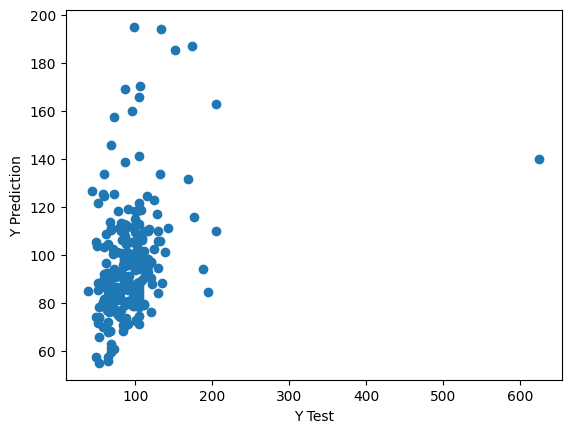

In [207]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### **Hyperparamter Tuning on Random Forest**

In [208]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [209]:
rf_params_grid = {
    'n_estimators': [int(x) for x in np.linspace(100, 1200, 12)], # Number of trees in random forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(5, 30, 6)], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10, 15, 100],  # Mininum number of samples
    'min_samples_leaf': [1, 2, 5, 10] # Minimum number of samples required at each leaf node 
}
rf_params_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [210]:
# Use random grid to search for best hyperparameters
# First create a base model to tune 
rf = RandomForestRegressor()

In [211]:
# Random search of parameters, using 3 fold cross validation
# Search across 100 different combinations 
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(rf, param_distributions=rf_params_grid, scoring = 'neg_mean_squared_error', n_iter=100)
rf_random.fit(X_train, y_train)

C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
285 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
285 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [212]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 5}

In [213]:
rf_random.best_score_

-2528.38242317732

**The cross val score has dropped (good)**

In [214]:
y_pred_rf_random = rf_random.predict(X_test)

In [215]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf_random)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf_random)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_rf_random)}")

Mean Absolute Error (MAE): 21.09851778420466
Mean Squared Error (MSE): 1691.650913796708
Root Mean Squared Error (RMSE): 41.129684095513156


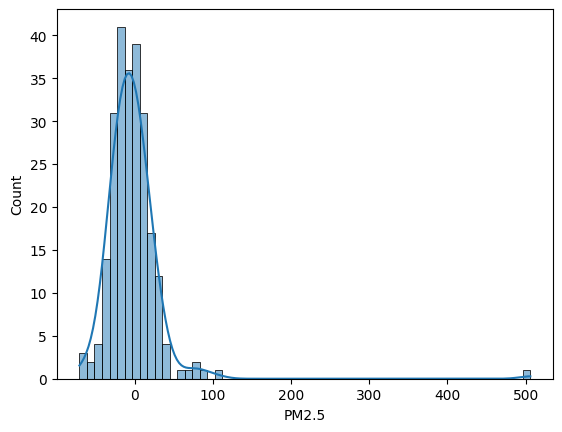

In [216]:
sns.histplot(y_test-y_pred_rf_random, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

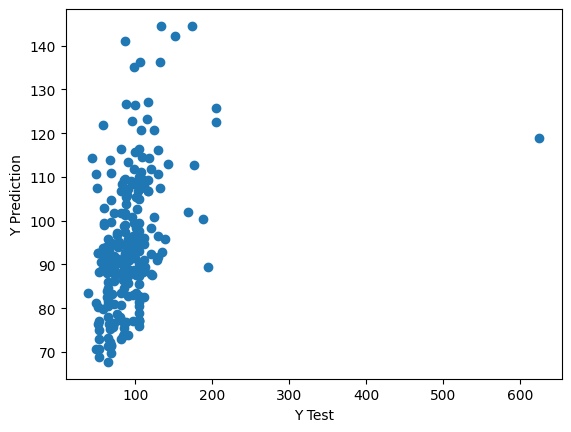

In [217]:
plt.scatter(y_test, y_pred_rf_random)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### Pickle Import

In [218]:
with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_random, file)

## **XGBoost Regression**

In [219]:
import xgboost as xgb

In [220]:
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Model Evaluation

In [221]:
print(f'Coefficient of determination R^2 on the Train Set: {rf_regressor.score(X_train, y_train)}')
print(f'Coefficient of determination R^2 on the Test Set: {rf_regressor.score(X_test, y_test)}')

Coefficient of determination R^2 on the Train Set: 0.8600003187888339
Coefficient of determination R^2 on the Test Set: 0.0525812244552627


> Above $R^2$ score for default parameter settings

In [222]:
score = cross_val_score(xgb_regressor, X, y, scoring='neg_mean_squared_error', cv=5)
score.mean()

-3296.800114132693

### **Hyperparamter Tuning on XGBoost**

In [223]:
# Randomized Search CV
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(100, 1200, 12)],
    'learning_rate' : ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'],
    'max_depth' : [int(x) for x in np.linspace(5, 30, 6)],
    'subsample' : [0.7, 0.6, 0.8],
    'min_child_weight' : [3, 4, 5, 6, 7]
}

In [224]:
xgb_regressor2 = xgb.XGBRegressor() # This model will be used in hyperparameter tuning

In [225]:
xg_random = RandomizedSearchCV(xgb_regressor2, param_distributions=param_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [226]:
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [227]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 15,
 'learning_rate': '0.05'}

In [228]:
xg_random.best_score_

-2766.0208583151657

In [229]:
rf_random.best_score_

-2528.38242317732

In [230]:
y_pred_xg_random = xg_random.predict(X_test)

In [231]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_xg_random)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_xg_random)}")
print(f"Root Mean Squared Error (RMSE): {root_mean_squared_error(y_test, y_pred_xg_random)}")

Mean Absolute Error (MAE): 23.851424980955006
Mean Squared Error (MSE): 1810.8722322878932
Root Mean Squared Error (RMSE): 42.55434445844388


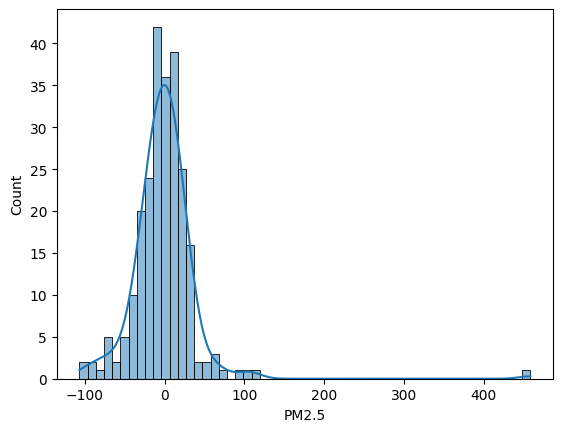

In [232]:
sns.histplot(y_test-y_pred_xg_random, kde=True); 

**The error distribution should be ideally be `Gaussian` but here the residual distribution seems to be skewed to the right**

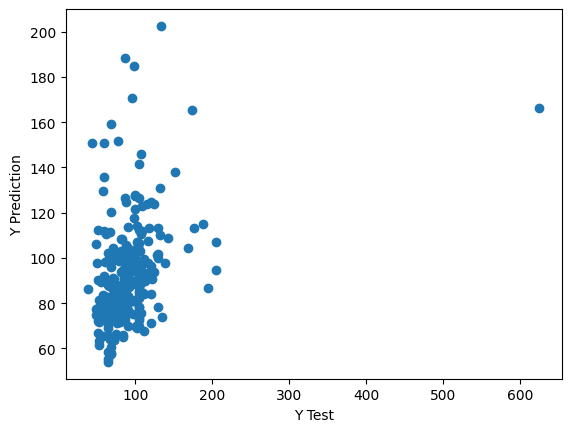

In [233]:
plt.scatter(y_test, y_pred_xg_random)
plt.xlabel('Y Test')
plt.ylabel('Y Prediction')
plt.show() 
# Ideally this plot should be a straight line y=x.

### Pickle Import

In [234]:
with open('xgboost_regression_model.pkl', 'wb') as file:
    pickle.dump(xg_random, file)

In [235]:
rf_random.predict([[1, 223, 1, 2, 3.0, 4.5, 99]])

C:\Users\arunb\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([149.35674722])